In [302]:
#import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [303]:
#import data

data = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\GTA Data Scientist Interview Dataset.csv',\
                   low_memory=False)
data.tail(20)

,Unnamed: 0,BOOKING_ID,CHECKIN_WINDOW,NO_OF_ROOMS,NO_OF_PASSENGERS,GROSS_SALES_EUR,COMMISSION_PERC,CLIENT_SEGMENT,SUPPLIER_CHAIN,STAR_RATING,ROOM_NIGHTS,CLIENT_MASTER_PARENT
13128,13129,13118,4,1,2,461.6653,1.222520,Retail Agent (Offline),Park Hotel Group,5,3,224
13129,13130,13119,44,1,2,156.3368,0.740205,Retail Agent (Offline),Hotel81,4,2,224
13130,13131,13120,12,1,2,394.3792,0.033178,Retail Agent (Offline),Hotel81,4,4,224
13131,13132,13121,89,1,2,196.8101,2.678365,Retail Agent (Offline),Accor,3,2,224
13132,13133,13122,13,1,2,376.9326,1.025212,Retail Agent (Offline),Hotel81,4,4,224
13133,13134,13123,267,2,3,323.0000,0.293462,Retail Online (Ota),Dorint ag,4,4,184
13134,13135,13124,141,1,2,226.0000,0.214812,Retail Online (Ota),Independent,2,3,184
13135,13136,13125,38,1,2,115.0000,0.263102,Retail Online (Ota),Independent,4,2,184
13136,13137,13126,1,1,4,71.0000,0.340377,Retail Online (Ota),Independent,1,2,184
13137,13138,13127,11,1,2,149.0000,0.091630,Retail Online (Ota),Independent,4,2,184


In [304]:
#deal with nan values

data = data.fillna(0)

**Question 1**

*Most of our bookings come from either OTAs or traditional agencies (Client Segment). Based on our data, are those two groups statistically different, on Gross Sales at individual transaction level? Use an appropriate statistical test of your choice and supplement it with some simple plots.*

In [6]:
table1 = data.groupby('CLIENT_SEGMENT').agg([np.sum])
table1

,Unnamed: 0,BOOKING_ID,CHECKIN_WINDOW,NO_OF_ROOMS,NO_OF_PASSENGERS,GROSS_SALES_EUR,COMMISSION_PERC,STAR_RATING,ROOM_NIGHTS,CLIENT_MASTER_PARENT
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLIENT_SEGMENT,,,,,,,,,,
Retail Agent (Offline),43140157,43075569,263836,8197,15929,3.270700e+06,14178.525684,31073,20846,858941
Retail Online (Ota),43301369,43262850,146518,5974,9787,1.114157e+06,2826.273297,19244,13353,808149


(array([0, 1]), <a list of 2 Text xticklabel objects>)

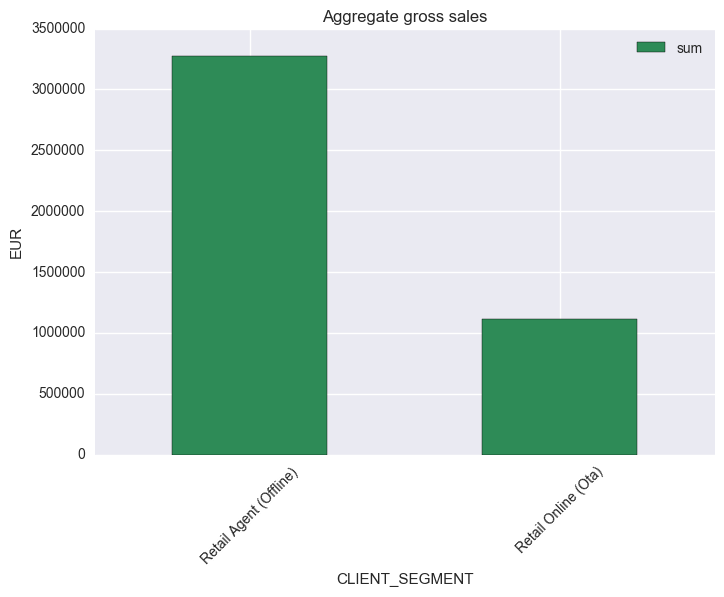

In [7]:
table1.GROSS_SALES_EUR.plot(kind='bar', color='seagreen')
plt.title('Aggregate gross sales')
plt.ylabel('EUR')
plt.xticks(rotation=45)

The two client types differ in terms of the volume of gross sales - the retail agent (offline) volumes are nearly three times as high as the retail online (ota) sales volume.

In [21]:
rao = data.loc[data['CLIENT_SEGMENT'] == 'Retail Agent (Offline)', 'GROSS_SALES_EUR']
ota = data.loc[data['CLIENT_SEGMENT'] == 'Retail Online (Ota)', 'GROSS_SALES_EUR']

RAO = pd.DataFrame(rao)
OTA = pd.DataFrame(ota)

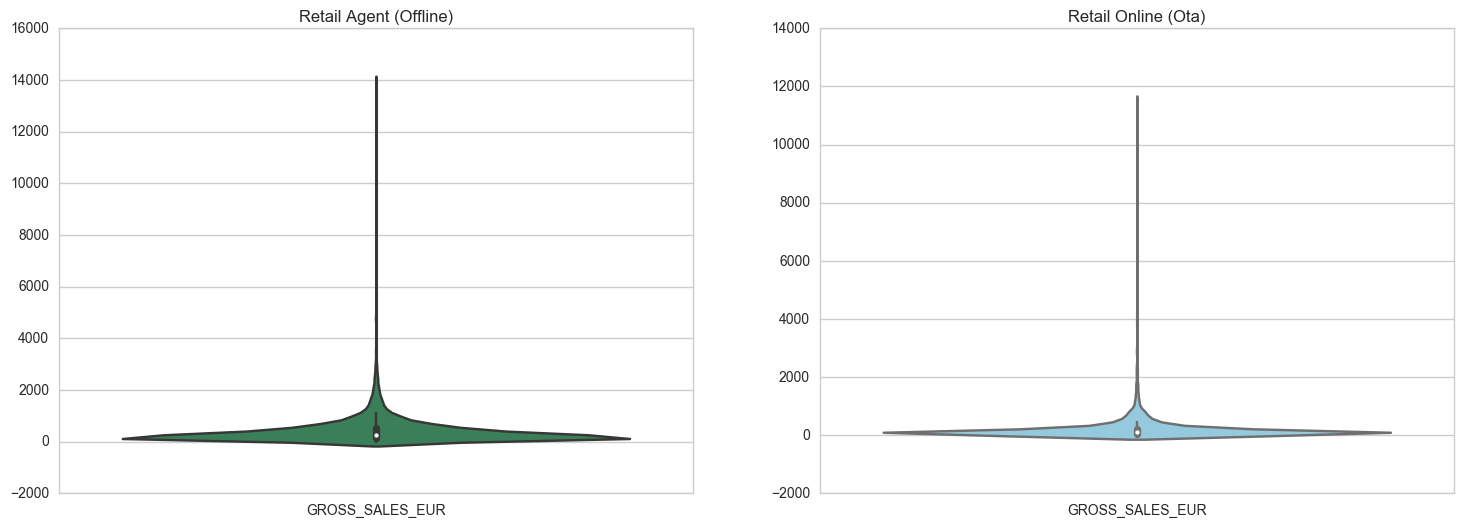

In [25]:
fig = plt.figure(figsize=(18,6))
sns.set_style("whitegrid")

sub1 = plt.subplot(1,2, 1)
sub1 = sns.violinplot(data=RAO, color='seagreen')
plt.title('Retail Agent (Offline)')

sub2 = plt.subplot(1,2, 2)
sub2 = sns.violinplot(data=OTA, color='skyblue')
plt.title('Retail Online (Ota)')

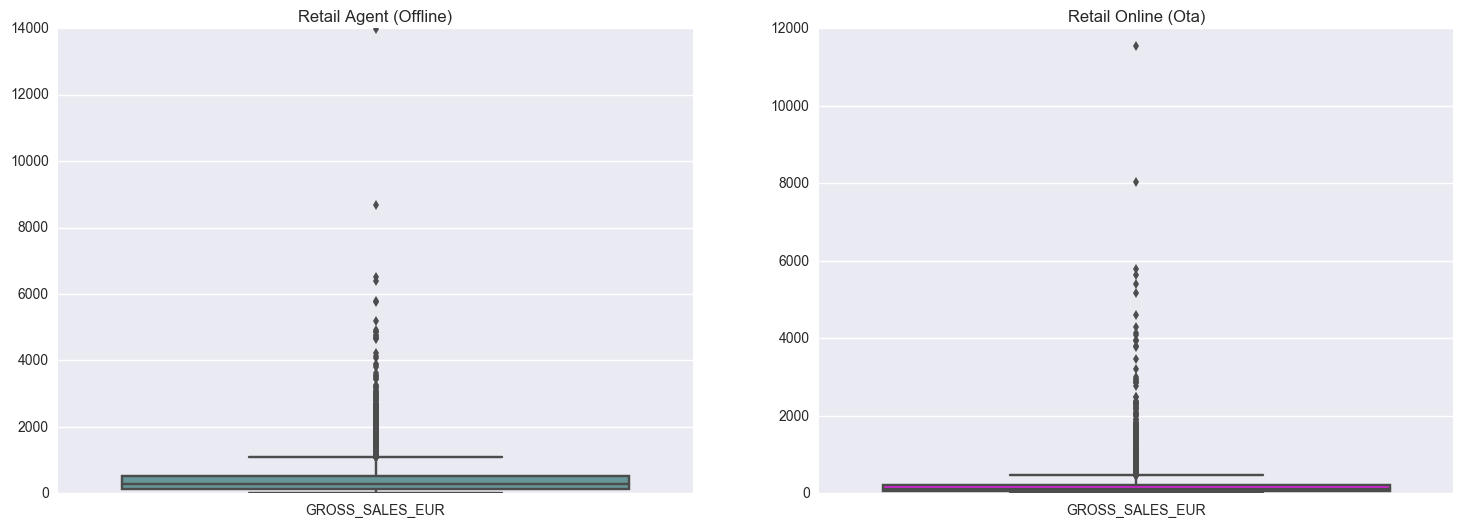

In [29]:
fig = plt.figure(figsize=(18,6))
sns.set_style("darkgrid")

sub1 = plt.subplot(1,2, 1)
sub1 = sns.boxplot(data=RAO, color='cadetblue')
plt.title('Retail Agent (Offline)')

sub2 = plt.subplot(1,2, 2)
sub2 = sns.boxplot(data=OTA, color='fuchsia')
plt.title('Retail Online (Ota)')

The above violin and boxplots illustrate again that the sales volume of traditional channels are significantly higher than those of online channels.

In [19]:
from scipy.stats import ttest_ind

rao = data.loc[data['CLIENT_SEGMENT'] == 'Retail Agent (Offline)', 'GROSS_SALES_EUR']
ota = data.loc[data['CLIENT_SEGMENT'] == 'Retail Online (Ota)', 'GROSS_SALES_EUR']

ttest_ind(rao, ota)

Ttest_indResult(statistic=24.386678874755265, pvalue=1.6590306888291448e-128)

The p-value is very small, therefore we can reject the null hypothesis - the two series are significantly different.

**Question 2**

*Find the 10 clients (Client Master Parent) who generated the most Gross Sales for us. What are the sales for Accor, Hilton Worldwide and Mandarin Oriental (Supplier Chain) from each of these clients? Present results in a single table.*

In [305]:
df2=pd.pivot_table(data=data,index=['CLIENT_MASTER_PARENT'],\
                   values='GROSS_SALES_EUR',aggfunc=np.sum)

In [306]:
df3 = pd.DataFrame(df2.nlargest(10))
df3

,GROSS_SALES_EUR
CLIENT_MASTER_PARENT,
139,717848.7117
184,345294.5000
68,277484.9517
85,274397.0059
178,203955.3700
191,164166.8934
51,142321.8729
38,102646.6866
122,83840.0190


In [307]:
df4 = data[data['CLIENT_MASTER_PARENT'].isin(df3.index)]

In [310]:
accor = pd.DataFrame(df4[df4['SUPPLIER_CHAIN'] == 'Accor'].groupby('CLIENT_MASTER_PARENT')['GROSS_SALES_EUR'].sum())
hilton = pd.DataFrame(df4[df4['SUPPLIER_CHAIN'] == 'Hilton Worldwide'].groupby('CLIENT_MASTER_PARENT')['GROSS_SALES_EUR'].sum())
mandarin = pd.DataFrame(df4[df4['SUPPLIER_CHAIN'] == 'Mandarin Oriental'].groupby('CLIENT_MASTER_PARENT')['GROSS_SALES_EUR'].sum())

In [330]:
sales = pd.concat([accor, hilton, mandarin], axis=1)
sales.columns = ['Accor', 'Hilton', 'Mandarin']
sales.fillna(0)
print("Sales for Accor, Hilton Worldwide and Mandarin Oriental\
(Supplier Chain) from each of the top 10 clients:")
sales

Sales for Accor, Hilton Worldwide and Mandarin Oriental(Supplier Chain) from each of the top 10 clients:


,Accor,Hilton,Mandarin
CLIENT_MASTER_PARENT,,,
38,12262.2170,7819.8273,4442.2279
51,1867.9504,18953.7581,NaN
68,16931.9354,24721.1245,NaN
85,27989.2226,17692.1717,2391.1727
122,2897.5619,1195.8098,NaN
139,80945.3497,26740.9066,7083.7564
151,4313.7313,4970.8948,NaN
178,17171.0582,13805.4671,2118.8433
184,7580.5000,2582.5000,NaN


**Question 3**

*(You are not required to build any models for this question!) Suppose that we have some transactions with missing Client Segment and any other variables that are directly related to it (say, client name). This implies that that we cannot simply tell whether those bookings were made by an OTA:
a.	We believe certain Machine Learning algorithms may be useful in answering this. Can you name some and suggest how they are different to each other? 
b.	The variables available in this dataset are relatively limited, what would you ask, or try in order to increase prediction accuracy?*


This is a classification task - the algorithm needs to determine whether a booking was made by a traditional or an online channel using the available variables.

In terms of algorithms, I would try Random Forests and XGBoost. Both are are ensembles of algorithm and are known to work well with classification tasks. 

Random Forests randomly divides up variables and builds trees in parallel using those sets. This is called bagging. The final result is achieved by voting. XGBoost builds weak learners (i.e. trees) sequentially which emphasize those with the largest error (boosting). Both models address overfitting. XGBoost permits parallel processing, making it very fast and tends to perform better than Random Forest. It also has a built-in cross-validation function.

Both models allow for parameter tuning, which allows for model optimisation. For instance, GridSearchCV searches for the best set of parameters and includes a cross-validation function (which I would use for RandomForests.

To increase prediction accuracy, one should investigate the correlation between variables. Uncorrelated variables can be eliminated. Alternatively, the above-mentioned algorithms can produce 'feature importances' and features with low importance could be taken out. 

In order to increase the amount of variables, one could generate new features such as ratios of existing variables. However, attention should be paid to their correlation to the target variable and other variables.